SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data=pd.read_csv("mushroom.csv")
Data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [3]:
Data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [4]:
Data['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [5]:
Data.describe().round(4)

,Unnamed: 0,stalk_height,cap_diameter
count,2000.0000,2000.0000,2000.0000
mean,624.9740,8.4491,12.3143
std,375.0919,3.6972,7.0488
min,0.0000,2.0000,1.0000
25%,290.0000,5.2910,5.7235
50%,607.0000,8.3186,12.1249
75%,957.2500,11.7813,18.6986
max,1279.0000,15.0951,25.0001


In [6]:
Data.describe(include= 'all').round(4)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.0000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.0000,2000.0000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.9740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4491,12.3143
std,375.0919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6972,7.0488
min,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,1.0000
25%,290.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2910,5.7235
50%,607.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3186,12.1249
75%,957.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7813,18.6986


In [7]:
Data.replace('?', pd.NA, inplace=True)
Data.dropna(inplace=True)

In [8]:
Data.describe(include= 'all').round(4)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.0000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.0000,2000.0000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.9740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4491,12.3143
std,375.0919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6972,7.0488
min,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,1.0000
25%,290.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2910,5.7235
50%,607.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3186,12.1249
75%,957.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7813,18.6986


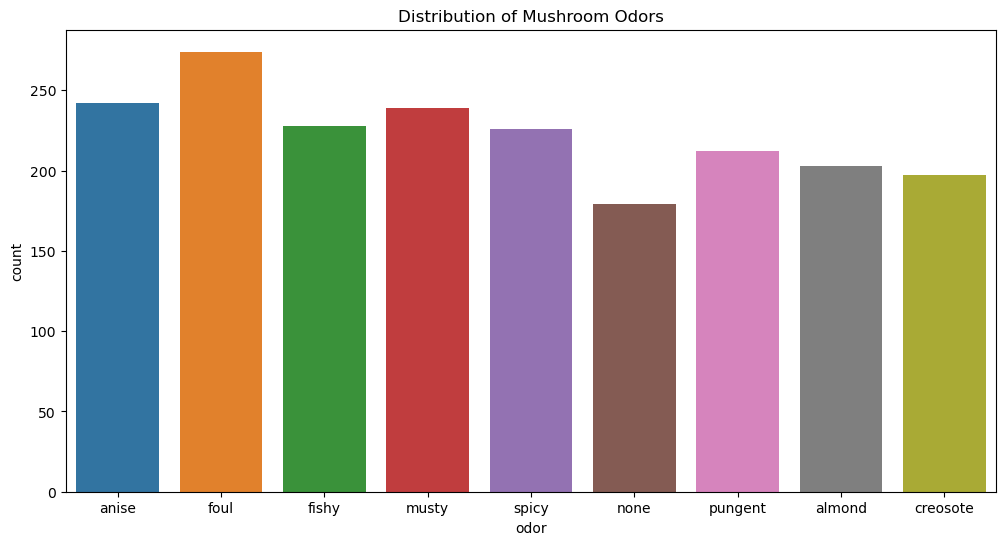

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='odor', data=Data)
plt.title("Distribution of Mushroom Odors")
plt.show()

In [10]:
# Foul- The most frequent odor — appears in the highest number of mushrooms.
# Anise, Musty, Fishy- Also quite high

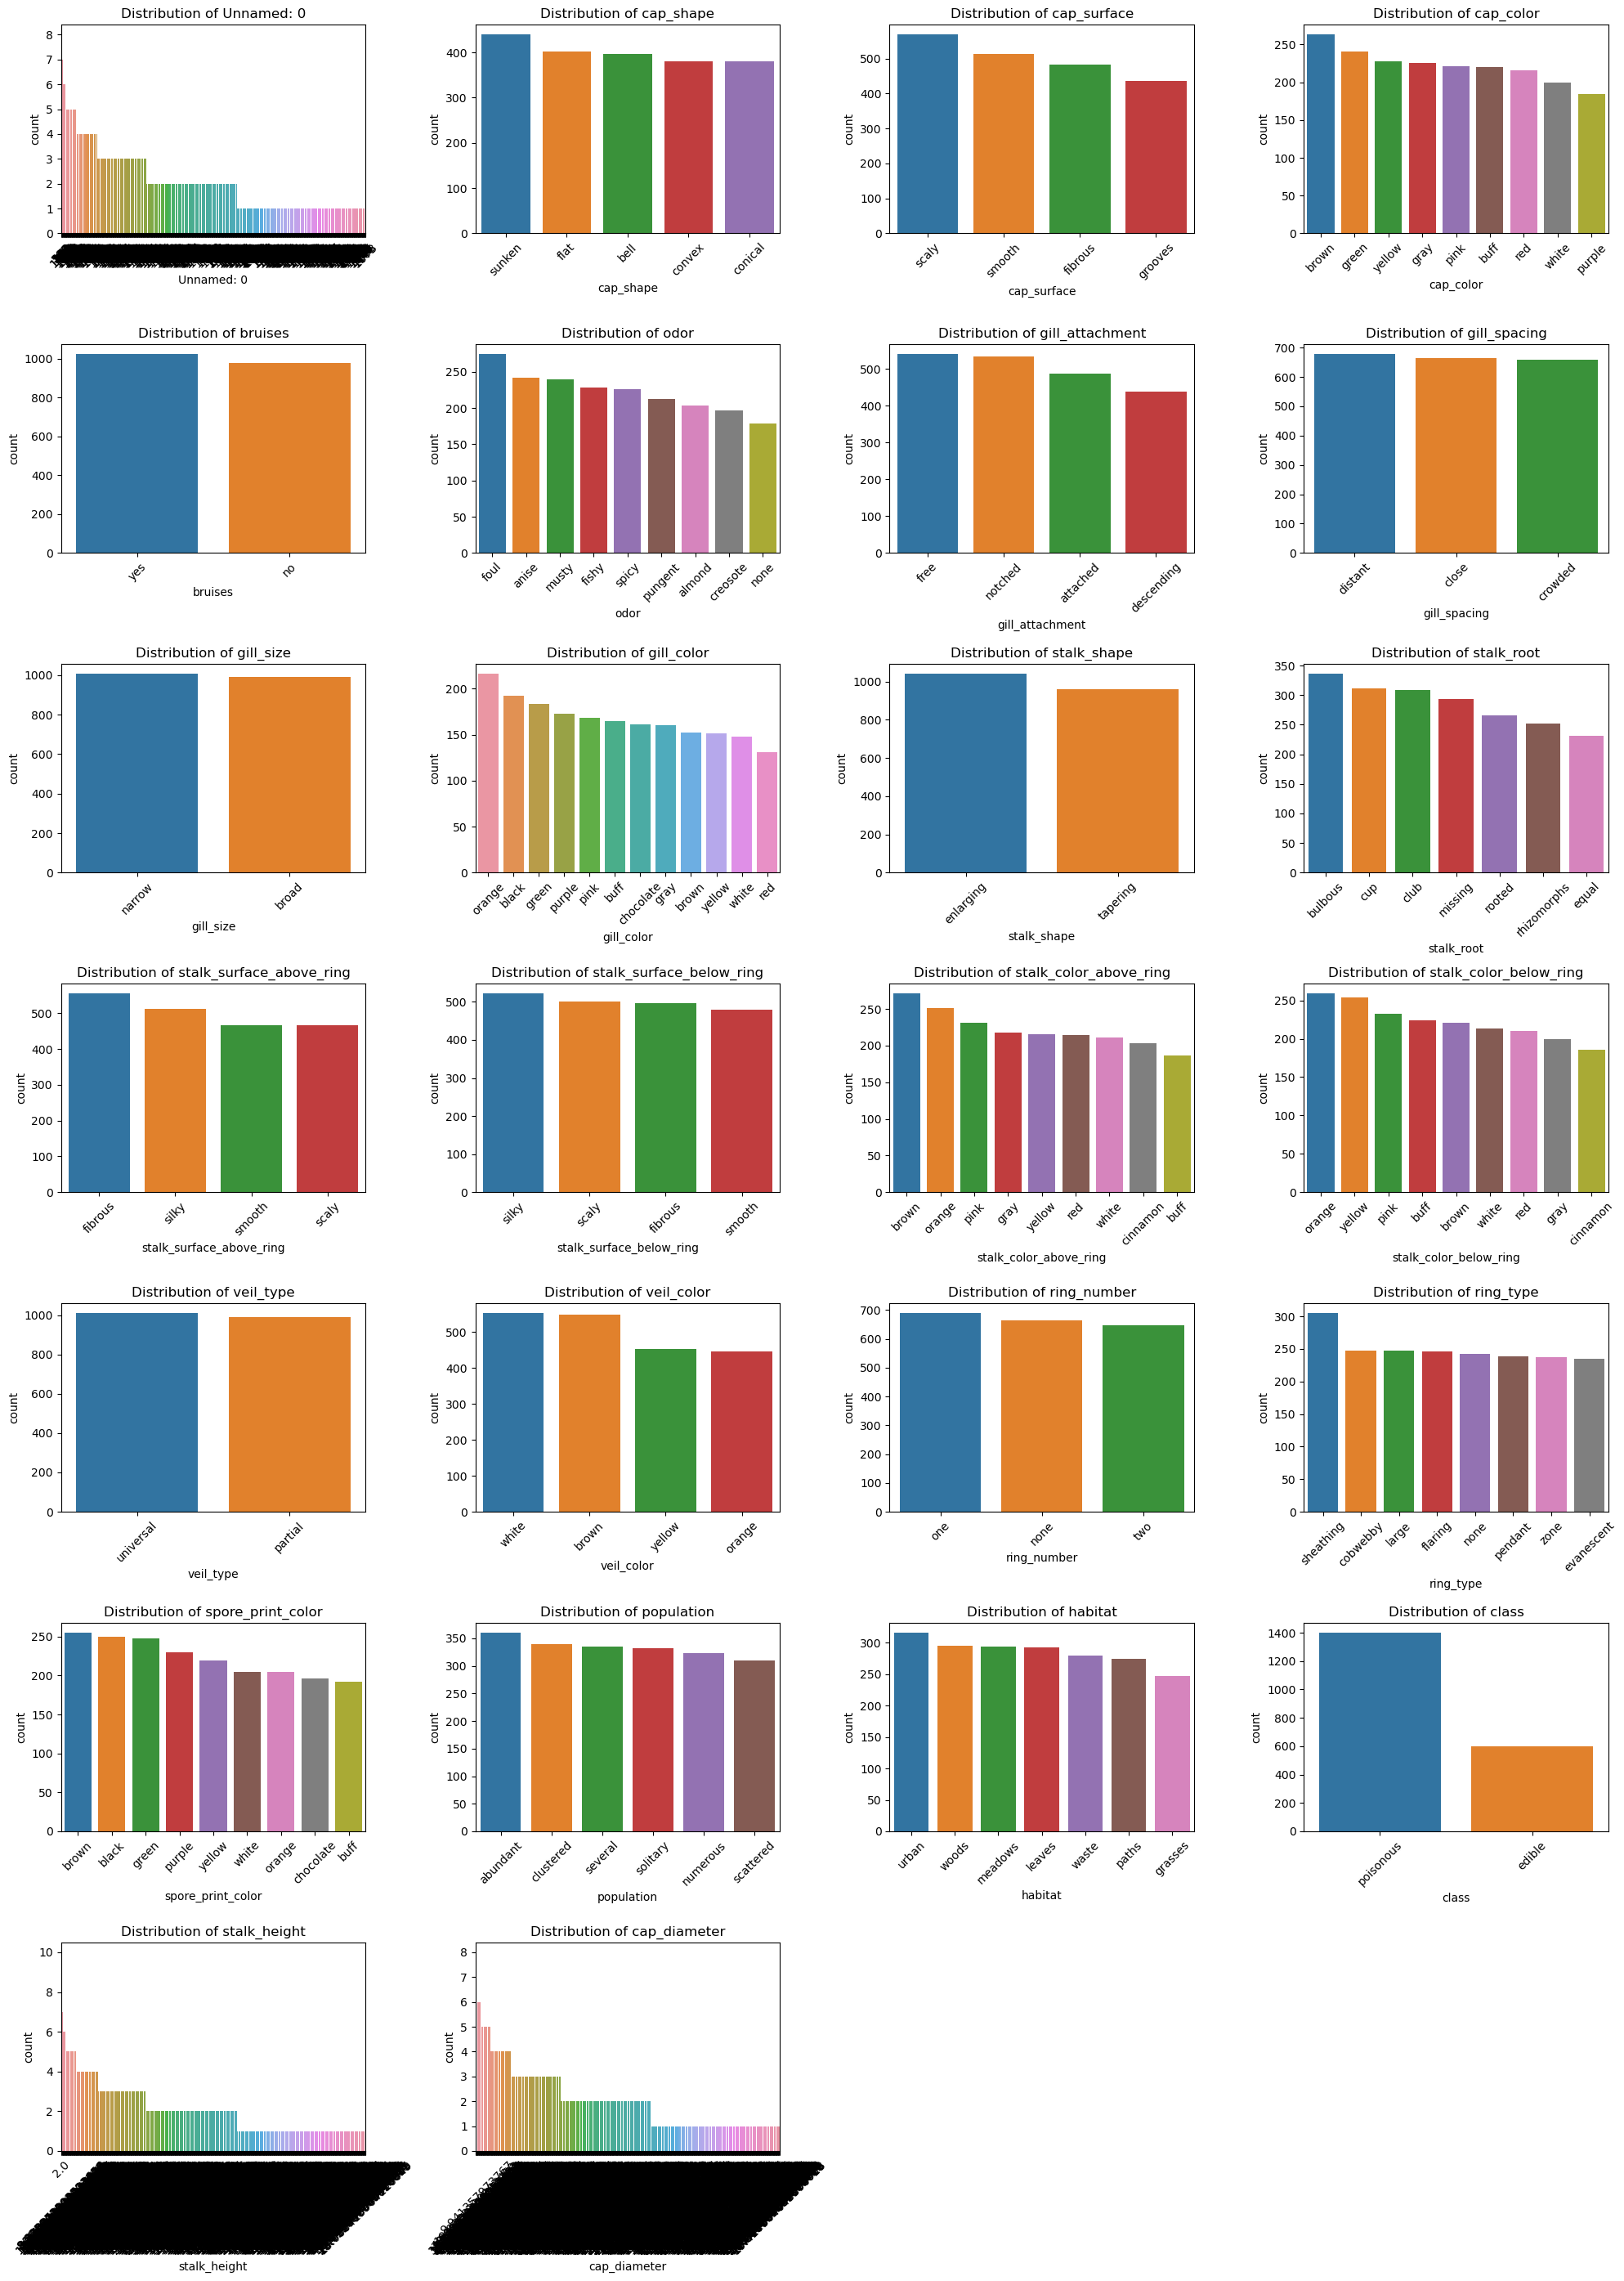

In [11]:
import math
n_cols = 4
n_rows = math.ceil(len(Data.columns) / n_cols)
plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(Data.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=Data, order=Data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
encoded_Data = Data.apply(LE.fit_transform)  

In [13]:
encoded_Data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


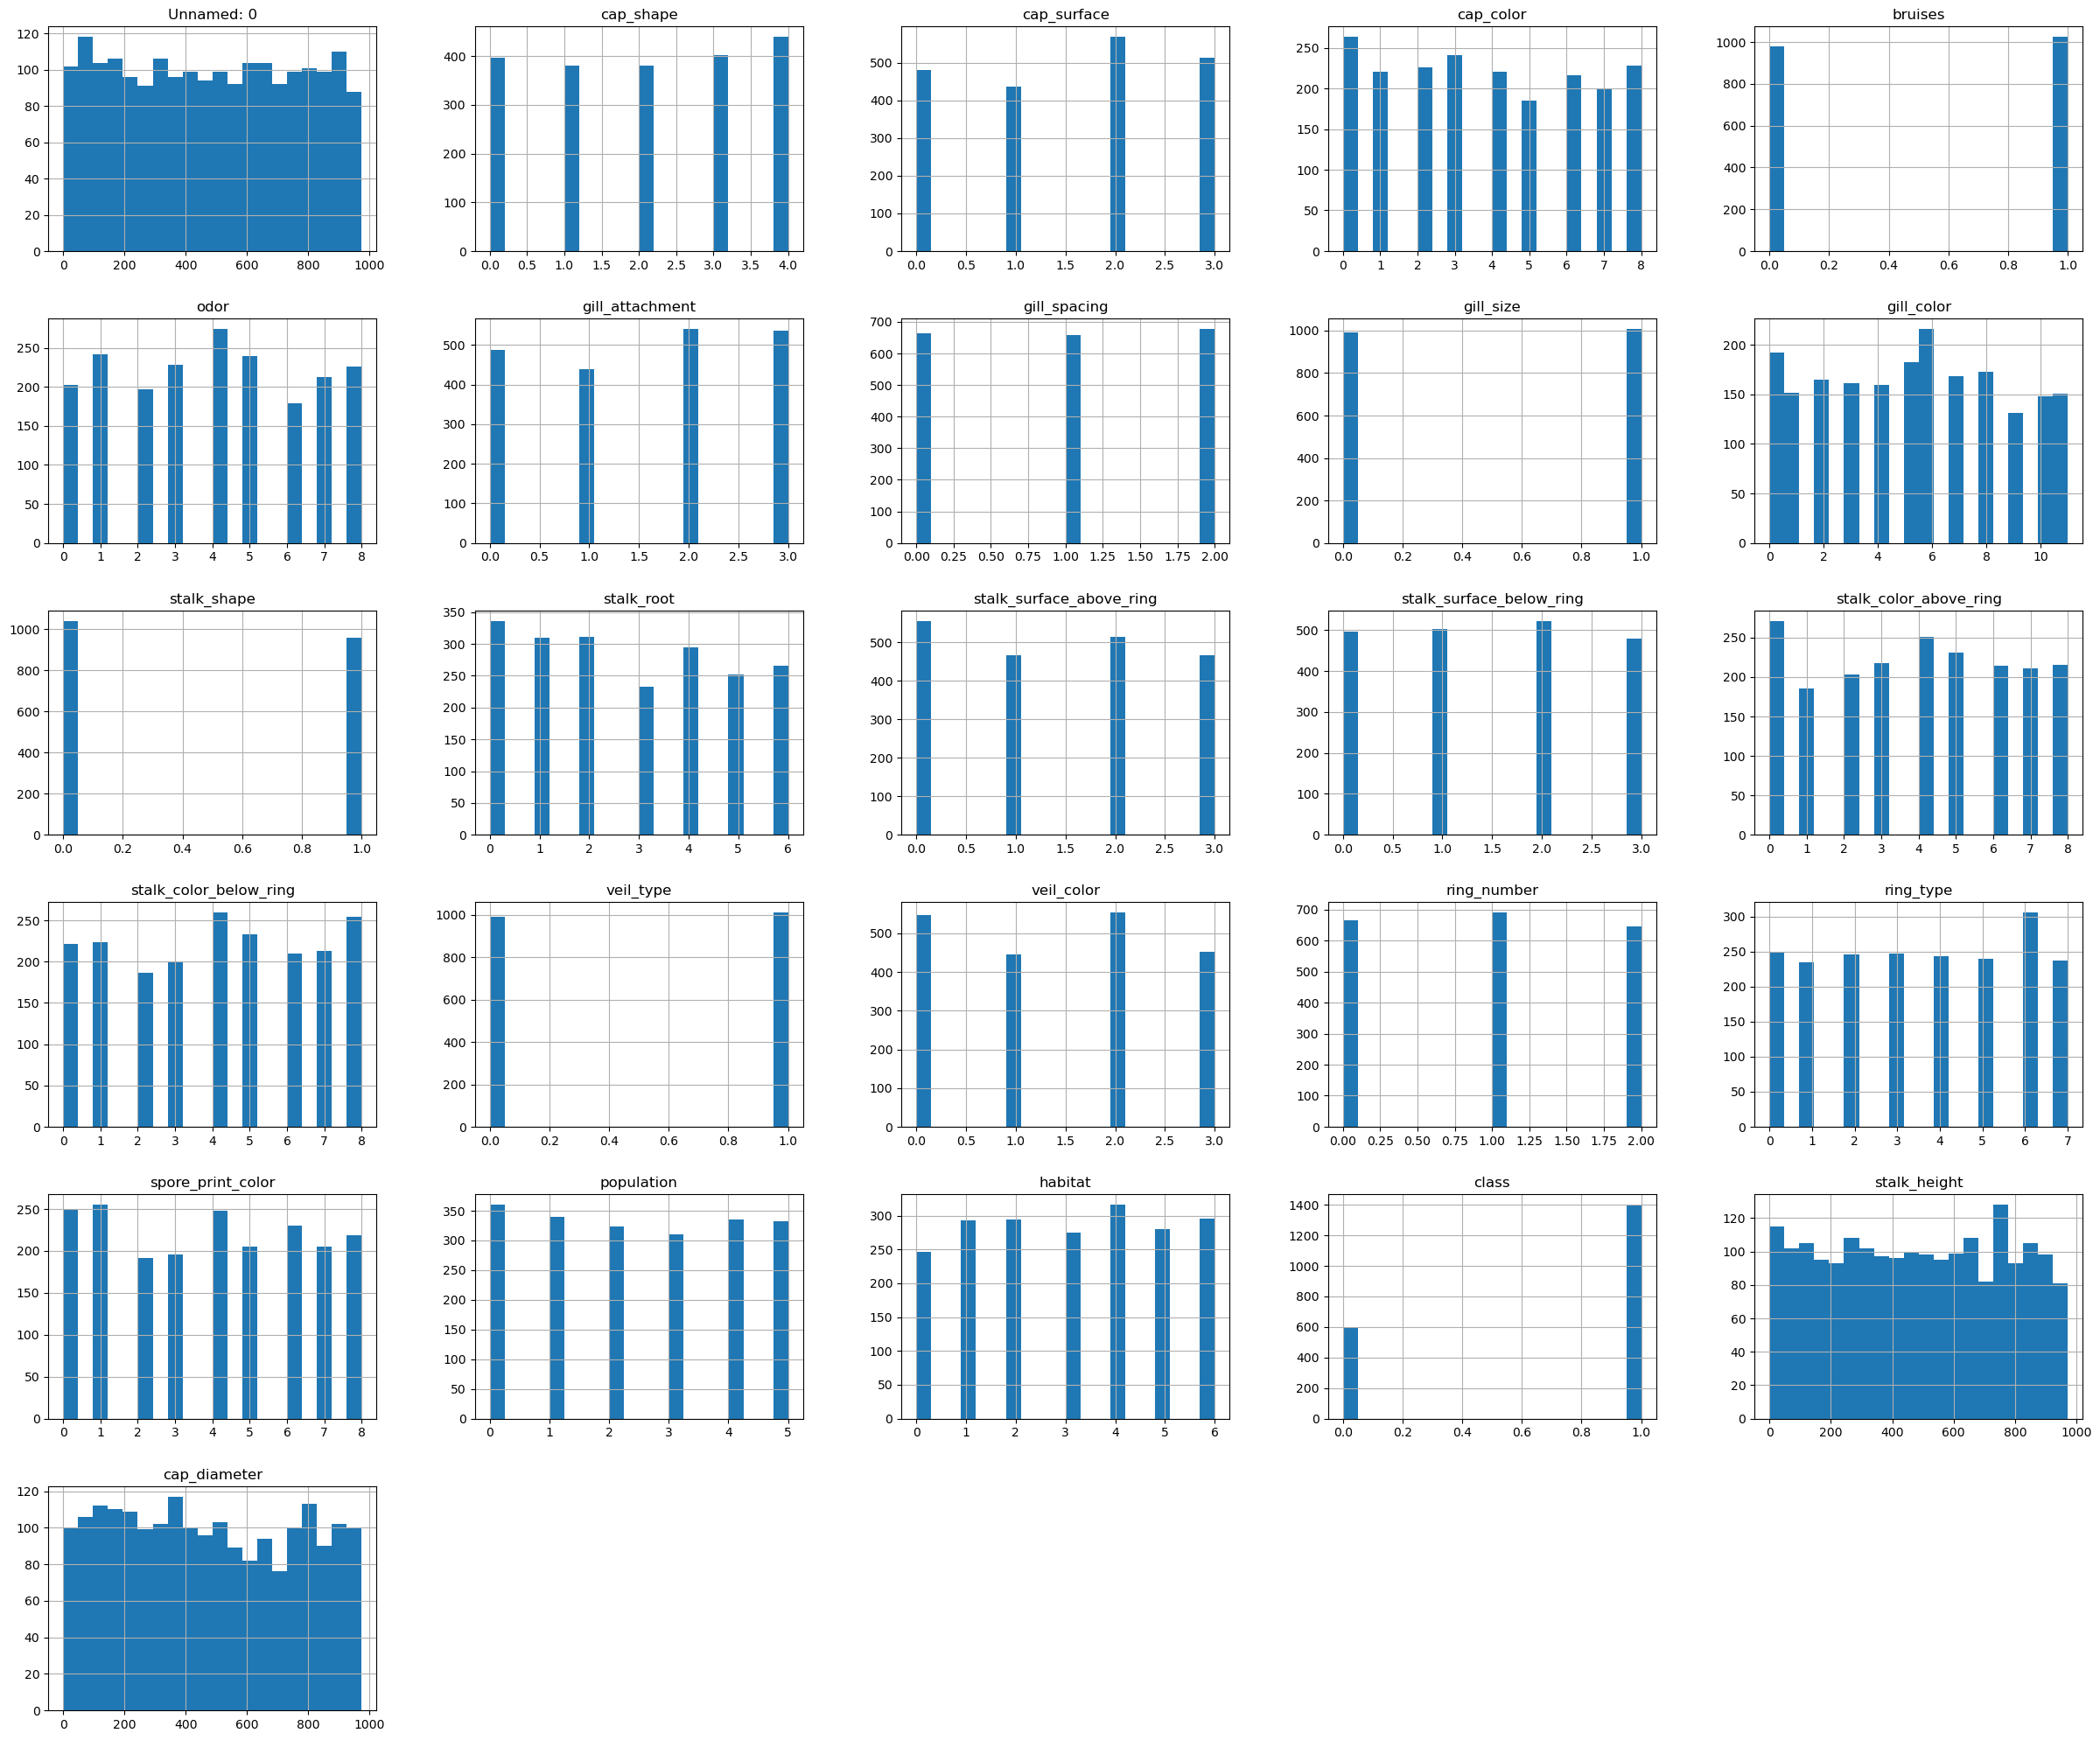

In [14]:
encoded_Data.hist(bins=20,figsize=(30,25))
plt.show()

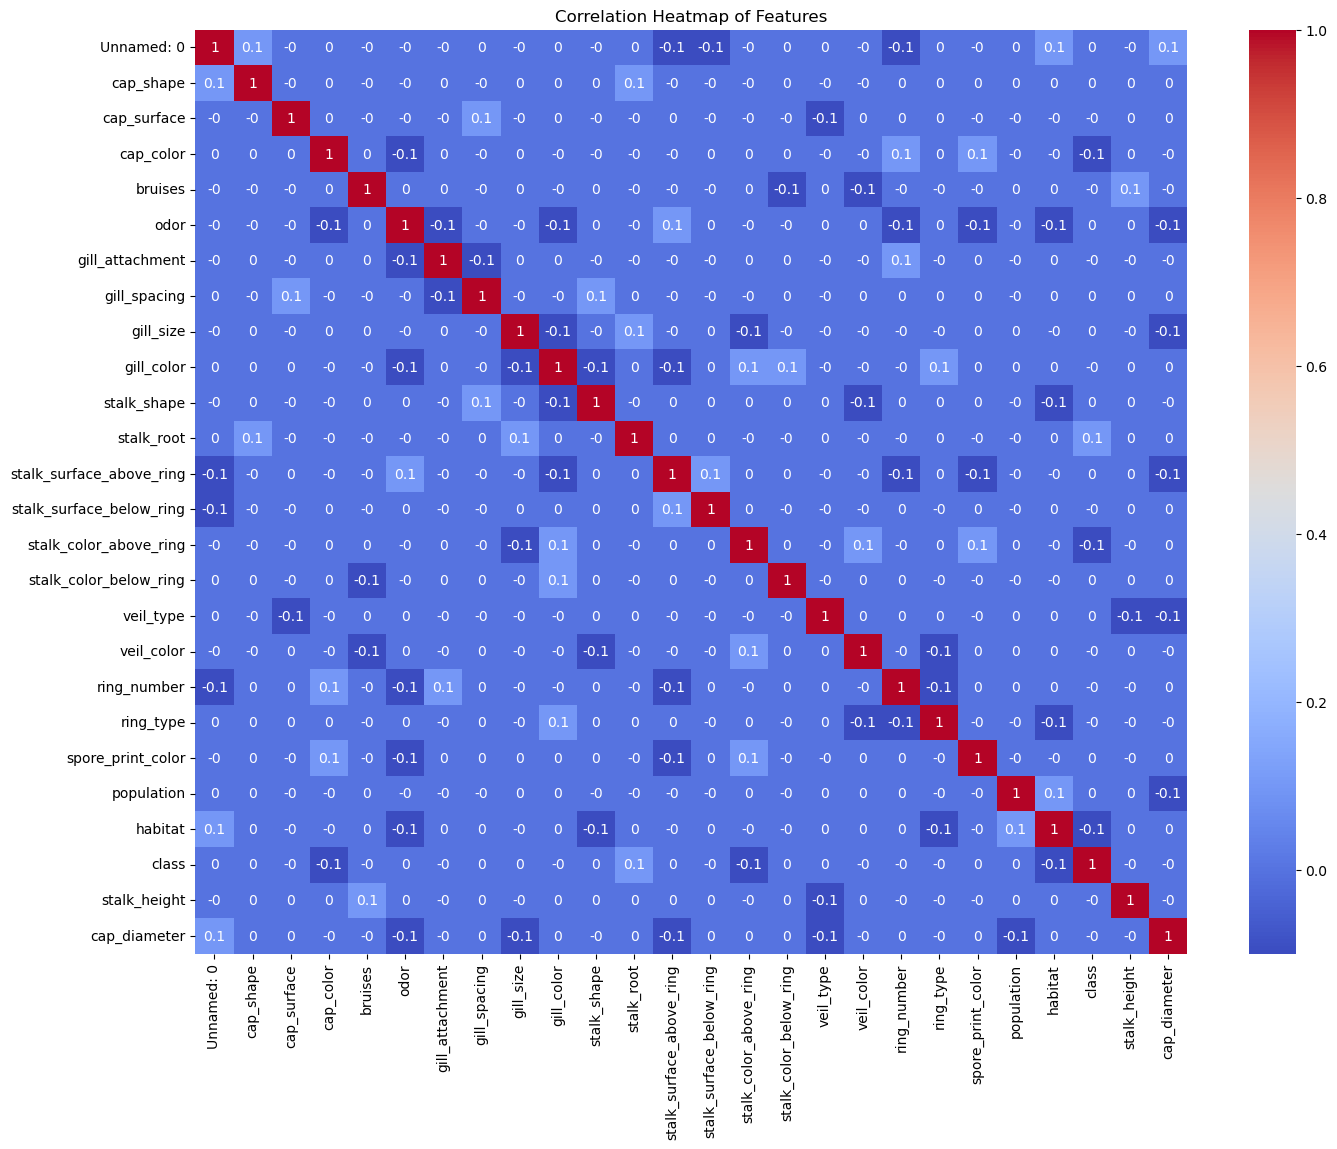

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(encoded_Data.corr().round(1), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [16]:
# most correlations are very low 

In [17]:
from sklearn.model_selection import train_test_split
Data_X = encoded_Data.drop('class', axis=1)
Data_y = encoded_Data['class']

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_y, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



In [21]:
# Accuracy is 69%, Macro score is 41%, here accuracy is less and class 0 is 0 which is not predicted properly

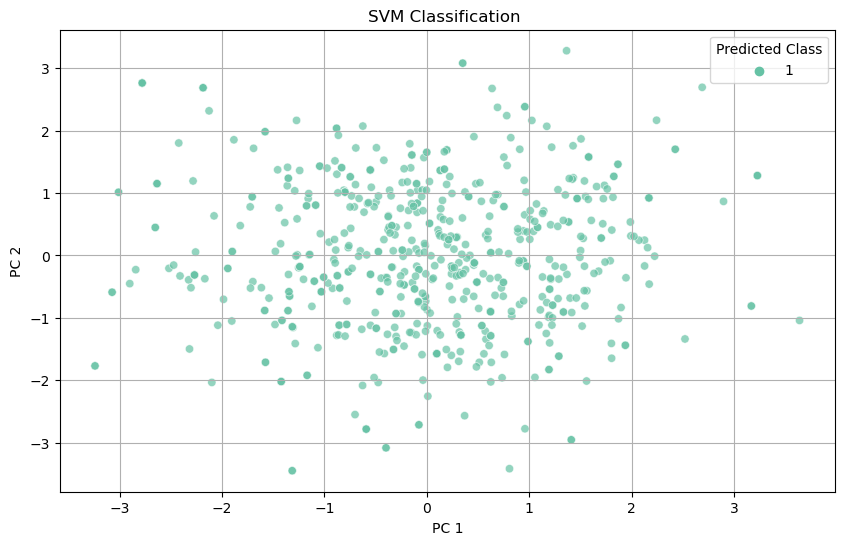

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test) 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1],
                hue=y_pred, palette='Set2', alpha=0.7)
plt.title("SVM Classification ")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Predicted Class")
plt.grid(True)
plt.show()

In [23]:
## here the plot has only one prediction-meaning the svm predicted the same class

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [25]:
params={
    'kernel':['rbf'],
    'gamma':['scale'],
    'C':[0.1,4,5]
}

In [26]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
grid = GridSearchCV(SVC(class_weight='balanced'), params, refit=True, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


In [28]:
# C= 5: Controls regularization, rbf - Radial Basis Function (Gaussian) kernel — good for non-linear classification.

In [29]:
y_pred_optimized = grid.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

Optimized Accuracy: 0.8566666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.76       185
           1       0.88      0.92      0.90       415

    accuracy                           0.86       600
   macro avg       0.84      0.82      0.83       600
weighted avg       0.85      0.86      0.85       600



In [30]:
# accuracy is 86%, SVM model is performing well overall, with strong results on the majority class 1.

In [31]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nKernel: {k}")
    print("Accuracy:", accuracy_score(y_test, preds))


Kernel: linear
Accuracy: 0.6916666666666667

Kernel: poly
Accuracy: 0.8116666666666666

Kernel: rbf
Accuracy: 0.7866666666666666


In [32]:
# Linear - has performed with very less accuracy

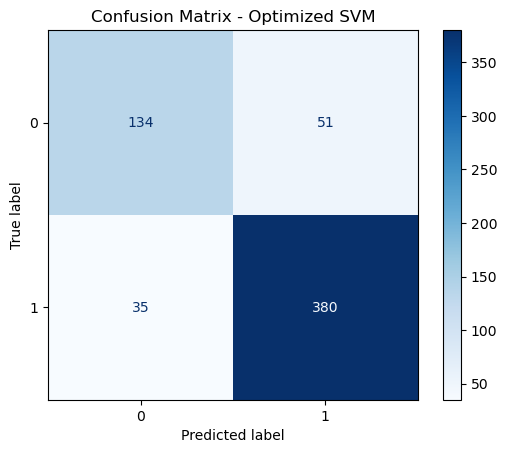

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Create and plot confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Optimized SVM')
plt.show()

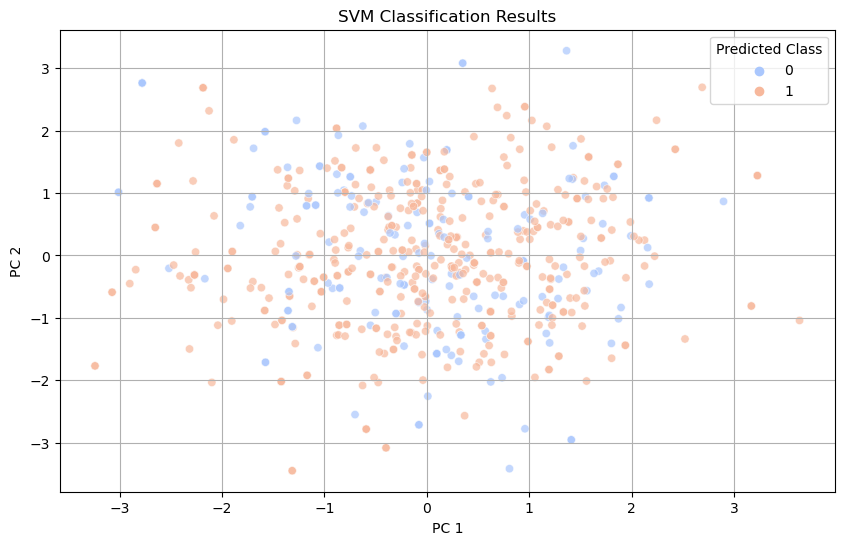

In [34]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],
                hue=y_pred_optimized, palette='coolwarm', alpha=0.7)
plt.title("SVM Classification Results")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title='Predicted Class', loc='upper right')
plt.grid(True)
plt.show()

In [35]:
#The SVM with non-linear kernels - RBF and polynomial performs significantly better than the linear kernel
# PCA reduced the data to two components for visualization, and SVM still classified with decent accuracy 85%

In [36]:
## Plot shows overlap but the model prediction is 85% accuracy.

In [37]:
#Non-linear boundaries:
#When data is not linearly separable, kernels like RBF or polynomial allow SVM to model complexity.

#Small to medium-sized datasets:
#SVM works well with limited data.

#Class imbalance 